In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import scipy as sp
import seaborn as sns
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from sklearn import metrics

## Price predictions for 3-years(End of Sprint 6)

#### Data Preprocessing

In [2]:
# read csv of 2022-2025 house data
house = pd.read_csv("../data/curated/match_house22_s.csv")
house23 = pd.read_csv("../data/curated/match_house23_s.csv")
house24 = pd.read_csv("../data/curated/match_house24_s.csv")
house25 = pd.read_csv("../data/curated/match_house25_s.csv")

# read csv of 2022-2025 apartment data
apart = pd.read_csv("../data/curated/match_apartment22_s.csv")
apart23 = pd.read_csv("../data/curated/match_apartment23_s.csv")
apart24 = pd.read_csv("../data/curated/match_apartment24_s.csv")
apart25 = pd.read_csv("../data/curated/match_apartment25_s.csv")

In [3]:
# check length of each dataframe
print(len(house), len(house23), len(house24), len(house25))
print(len(apart), len(apart23), len(apart24), len(apart25))

706 705 706 706
744 743 744 744


In [4]:
# extract suburb from 2022-2023 house and apartment dataframe
h23 = list(house23['suburb'])
h22 = list(house['suburb'])

In [5]:
# empty dictionary to store number of suburbs in 2023 house dataframe
dic_h23 = {}
for i in h23:
    if i not in dic_h23.keys():
        dic_h23[i] = 1
    dic_h23[i] += 1

In [6]:
# same as above
dic_h22 = {}
for i in h22:
    if i not in dic_h22.keys():
        dic_h22[i] = 1
    dic_h22[i] += 1

In [7]:
# check which suburb is in 2022 house dataframe but not 2023
for i in list(dic_h23.keys()):
    if dic_h23[i] == dic_h22[i]:
        continue
    print(i)

BLACKBURN SOUTH


In [8]:
# find the index of the extra suburb
h22.index('BLACKBURN SOUTH')

688

In [9]:
# compare 2022 and 2023 house dataframe and find the extra row
house.head(691)

,Unnamed: 0,Unnamed: 0.1,price,suburb,beds,baths,parking,latitudes,longitudes,school,...,hospital,shopping_center,park,2022income,2022house_price,Unnamed: 0.1.1,erp_2022,net_internal_migration_2021_22,net_overseas_migration_2021_22,natural_increase_2021_22
0,0,0,1100,EAST MELBOURNE,4,2,1,-37.8101,144.9500,5246.2,...,960.7,737.0,3319.6,4224.0,444000.0,145,6335.2,-63.4,-191.0,-7.6
1,1,1,1100,EAST MELBOURNE,4,2,1,-37.8101,144.9500,5246.2,...,960.7,737.0,3319.6,4224.0,627700.0,145,6335.2,-63.4,-191.0,-7.6
2,2,2,1150,EAST MELBOURNE,4,2,0,-37.8167,144.9879,8137.6,...,620.2,1558.5,1235.1,4224.0,444000.0,145,6335.2,-63.4,-191.0,-7.6
3,3,3,1150,EAST MELBOURNE,4,2,0,-37.8167,144.9879,8137.6,...,620.2,1558.5,1235.1,4224.0,627700.0,145,6335.2,-63.4,-191.0,-7.6
4,4,4,525,EAST MELBOURNE,2,1,1,-37.8101,144.9500,5246.2,...,960.7,737.0,3319.6,4224.0,444000.0,145,6335.2,-63.4,-191.0,-7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,696,708,440,ALTONA,3,2,2,-37.7750,144.8333,5655.2,...,3950.7,1418.2,474.8,8774.0,712000.0,367,14690.8,-101.8,-79.2,62.4
687,697,709,560,GEELONG,4,2,1,-38.1662,144.3943,11301.3,...,2767.2,740.6,480.7,9086.4,642750.0,96,14126.6,5.0,-63.4,24.2
688,698,710,770,BLACKBURN SOUTH,4,3,1,-37.8232,145.1511,5255.6,...,1195.6,1864.2,744.1,6653.6,773700.0,179,11684.2,-246.4,-122.6,-17.4
689,699,711,770,BLACKBURN SOUTH,4,3,1,-37.8232,145.1511,5255.6,...,1195.6,1864.2,744.1,6653.6,769600.0,179,11684.2,-246.4,-122.6,-17.4


In [10]:
house23.head(691)

,Unnamed: 0,Unnamed: 0.1,price,suburb,beds,baths,parking,latitudes,longitudes,school,...,hospital,shopping_center,park,2023income,2023house_price,Unnamed: 0.1.1,erp_2023,net_internal_migration_2022_23,net_overseas_migration_2022_23,natural_increase_2022_23
0,0,0,1100,EAST MELBOURNE,4,2,1,-37.8101,144.9500,5246.2,...,960.7,737.0,3319.6,4303.2,370000.0,145,6476.5,-83.3,-250.9,-9.7
1,1,1,1100,EAST MELBOURNE,4,2,1,-37.8101,144.9500,5246.2,...,960.7,737.0,3319.6,4303.2,641900.0,145,6476.5,-83.3,-250.9,-9.7
2,2,2,1150,EAST MELBOURNE,4,2,0,-37.8167,144.9879,8137.6,...,620.2,1558.5,1235.1,4303.2,370000.0,145,6476.5,-83.3,-250.9,-9.7
3,3,3,1150,EAST MELBOURNE,4,2,0,-37.8167,144.9879,8137.6,...,620.2,1558.5,1235.1,4303.2,641900.0,145,6476.5,-83.3,-250.9,-9.7
4,4,4,525,EAST MELBOURNE,2,1,1,-37.8101,144.9500,5246.2,...,960.7,737.0,3319.6,4303.2,370000.0,145,6476.5,-83.3,-250.9,-9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,696,708,440,ALTONA,3,2,2,-37.7750,144.8333,5655.2,...,3950.7,1418.2,474.8,8938.8,731000.0,367,14937.3,-129.7,-121.8,59.3
687,697,709,560,GEELONG,4,2,1,-38.1662,144.3943,11301.3,...,2767.2,740.6,480.7,9271.6,665800.0,96,14297.1,13.8,-114.1,22.5
688,698,710,770,BLACKBURN SOUTH,4,3,1,-37.8232,145.1511,5255.6,...,1195.6,1864.2,744.1,6754.5,781200.0,179,11757.7,-281.5,-174.6,-23.7
689,700,713,280,WERRIBEE - SOUTH,2,1,3,-37.8887,144.7260,4282.2,...,5762.1,1466.1,847.4,10676.4,321200.0,391,17679.4,815.3,-150.7,73.9


In [11]:
# remove extra row to keep all dataframe in the same length
house.drop([689], axis=0, inplace=True)
house24.drop([689], axis=0, inplace=True)
house25.drop([689], axis=0, inplace=True)

In [12]:
# perform the same steps for apartment
a23 = list(apart23['suburb'])
a22 = list(apart['suburb'])
dic_a23 = {}
for i in a23:
    if i not in dic_a23.keys():
        dic_a23[i] = 1
    dic_a23[i] += 1
dic_a22 = {}
for i in a22:
    if i not in dic_a22.keys():
        dic_a22[i] = 1
    dic_a22[i] += 1
for i in list(dic_a23.keys()):
    if dic_a23[i] == dic_a22[i]:
        continue
    print(i)

BLACKBURN SOUTH


In [13]:
# find the index of the extra suburb
a22.index('BLACKBURN SOUTH')

661

In [14]:
apart.head(664)

,Unnamed: 0,Unnamed: 0.1,price,suburb,beds,baths,parking,latitudes,longitudes,school,...,hospital,shopping_center,park,2022income,2022house_price,Unnamed: 0.1.1,erp_2022,net_internal_migration_2021_22,net_overseas_migration_2021_22,natural_increase_2021_22
0,0,0,495,EAST MELBOURNE,1,1,1,-37.8167,144.9879,8137.6,...,620.2,1558.5,1235.1,4224.0,444000.0,145,6335.2,-63.4,-191.0,-7.6
1,1,1,495,EAST MELBOURNE,1,1,1,-37.8167,144.9879,8137.6,...,620.2,1558.5,1235.1,4224.0,627700.0,145,6335.2,-63.4,-191.0,-7.6
2,2,2,420,EAST MELBOURNE,2,1,1,-37.8167,144.9879,8137.6,...,620.2,1558.5,1235.1,4224.0,444000.0,145,6335.2,-63.4,-191.0,-7.6
3,3,3,420,EAST MELBOURNE,2,1,1,-37.8167,144.9879,8137.6,...,620.2,1558.5,1235.1,4224.0,627700.0,145,6335.2,-63.4,-191.0,-7.6
4,4,4,550,EAST MELBOURNE,1,1,1,-37.8167,144.9879,8137.6,...,620.2,1558.5,1235.1,4224.0,444000.0,145,6335.2,-63.4,-191.0,-7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,662,716,440,SPRINGVALE,3,1,1,-37.9457,145.1581,4665.9,...,1398.9,3704.1,1541.9,14714.6,622200.0,342,24642.8,-1002.8,-441.6,37.6
660,663,717,380,SPRINGVALE,2,1,1,-37.9457,145.1581,4665.9,...,1398.9,3704.1,1541.9,14714.6,622200.0,342,24642.8,-1002.8,-441.6,37.6
661,664,718,405,BLACKBURN SOUTH,2,1,1,-37.8232,145.1511,5255.6,...,1195.6,1864.2,744.1,6653.6,773700.0,179,11684.2,-246.4,-122.6,-17.4
662,665,719,405,BLACKBURN SOUTH,2,1,1,-37.8232,145.1511,5255.6,...,1195.6,1864.2,744.1,6653.6,769600.0,179,11684.2,-246.4,-122.6,-17.4


In [15]:
apart23.head(664)

,Unnamed: 0,Unnamed: 0.1,price,suburb,beds,baths,parking,latitudes,longitudes,school,...,hospital,shopping_center,park,2023income,2023house_price,Unnamed: 0.1.1,erp_2023,net_internal_migration_2022_23,net_overseas_migration_2022_23,natural_increase_2022_23
0,0,0,495,EAST MELBOURNE,1,1,1,-37.8167,144.9879,8137.6,...,620.2,1558.5,1235.1,4303.2,370000.0,145,6476.5,-83.3,-250.9,-9.7
1,1,1,495,EAST MELBOURNE,1,1,1,-37.8167,144.9879,8137.6,...,620.2,1558.5,1235.1,4303.2,641900.0,145,6476.5,-83.3,-250.9,-9.7
2,2,2,420,EAST MELBOURNE,2,1,1,-37.8167,144.9879,8137.6,...,620.2,1558.5,1235.1,4303.2,370000.0,145,6476.5,-83.3,-250.9,-9.7
3,3,3,420,EAST MELBOURNE,2,1,1,-37.8167,144.9879,8137.6,...,620.2,1558.5,1235.1,4303.2,641900.0,145,6476.5,-83.3,-250.9,-9.7
4,4,4,550,EAST MELBOURNE,1,1,1,-37.8167,144.9879,8137.6,...,620.2,1558.5,1235.1,4303.2,370000.0,145,6476.5,-83.3,-250.9,-9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,662,716,440,SPRINGVALE,3,1,1,-37.9457,145.1581,4665.9,...,1398.9,3704.1,1541.9,15343.7,649800.0,342,24930.9,-1075.9,-693.7,8.5
660,663,717,380,SPRINGVALE,2,1,1,-37.9457,145.1581,4665.9,...,1398.9,3704.1,1541.9,15343.7,649800.0,342,24930.9,-1075.9,-693.7,8.5
661,664,718,405,BLACKBURN SOUTH,2,1,1,-37.8232,145.1511,5255.6,...,1195.6,1864.2,744.1,6754.5,781200.0,179,11757.7,-281.5,-174.6,-23.7
662,665,720,595,CLAYTON,5,3,2,-37.9167,145.1333,1445.5,...,2090.1,2278.2,1246.4,13659.6,739500.0,348,32195.7,-80.3,-4160.4,-32.3


In [16]:
# remove extra row to keep all dataframe in the same length
apart.drop([661], axis=0, inplace=True)
apart24.drop([661], axis=0, inplace=True)
apart25.drop([661], axis=0, inplace=True)

In [17]:
# reset index for each dataframe
house = house.reset_index(drop=True)
house24 = house24.reset_index(drop=True)
house25 = house25.reset_index(drop=True)
apart = apart.reset_index(drop=True)
apart24 = apart24.reset_index(drop=True)
apart25 = apart25.reset_index(drop=True)

In [18]:
# create new dataframe to store prediction for house and apartment
new = house.loc[:, 'price':'suburb']
columns_titles = ["suburb", "price"]
df_house=new.reindex(columns=columns_titles)
df_house.columns = df_house.columns.str.replace('price', 'price2022')

apartment = apart.loc[:, 'price':'suburb']
columns_titles = ["suburb", "price"]
apartment=apartment.reindex(columns=columns_titles)
apartment.columns = apartment.columns.str.replace('price', 'price2022')

In [19]:
# Select usefull columns
lst = ['price', 'suburb', 'beds', 'baths', 'parking',
       'latitudes', 'longitudes', 'school', 'train_station', 'fitness_gym',
       'hospital', 'shopping_center', 'park', 'erp_2022',
       'natural_increase_2021_22', 'net_internal_migration_2021_22',
       'net_overseas_migration_2021_22', '2022income']
house = house.loc[:,lst]

lst23 = ['price', 'suburb', 'beds', 'baths', 'parking',
       'latitudes', 'longitudes', 'school', 'train_station', 'fitness_gym',
       'hospital', 'shopping_center', 'park', 'erp_2023',
       'natural_increase_2022_23', 'net_internal_migration_2022_23',
       'net_overseas_migration_2022_23', '2023income']
house23 = house23.loc[:,lst23]

lst24 = ['price', 'suburb', 'beds', 'baths', 'parking',
       'latitudes', 'longitudes', 'school', 'train_station', 'fitness_gym',
       'hospital', 'shopping_center', 'park', 'erp_2024',
       'natural_increase_2023_24', 'net_internal_migration_2023_24',
       'net_overseas_migration_2023_24', '2024income']
house24 = house24.loc[:,lst24]

lst25 = ['price', 'suburb', 'beds', 'baths', 'parking',
       'latitudes', 'longitudes', 'school', 'train_station', 'fitness_gym',
       'hospital', 'shopping_center', 'park', 'erp_2025',
       'natural_increase_2024_25', 'net_internal_migration_2024_25',
       'net_overseas_migration_2024_25', '2025income']
house25 = house25.loc[:,lst25]

# same steps for apartment 
apart = apart.loc[:,lst]
apart23 = apart23.loc[:,lst23]
apart24 = apart24.loc[:,lst24]
apart25 = apart25.loc[:,lst25]

In [20]:
# Discretization
sub_list = pd.factorize(house["suburb"])[1]
sub_l = pd.factorize(apart["suburb"])[1]
house['suburbID'] = pd.factorize(house["suburb"])[0].astype(np.uint16)
apart['suburbID'] = pd.factorize(apart["suburb"])[0].astype(np.uint16)

sub_list23 = pd.factorize(house23["suburb"])[1]
sub_l23 = pd.factorize(apart23["suburb"])[1]
house23['suburbID'] = pd.factorize(house23["suburb"])[0].astype(np.uint16)
apart23['suburbID'] = pd.factorize(apart23["suburb"])[0].astype(np.uint16)

sub_list24 = pd.factorize(house24["suburb"])[1]
sub_l24 = pd.factorize(apart24["suburb"])[1]
house24['suburbID'] = pd.factorize(house24["suburb"])[0].astype(np.uint16)
apart24['suburbID'] = pd.factorize(apart24["suburb"])[0].astype(np.uint16)

sub_list25 = pd.factorize(house25["suburb"])[1]
sub_l25 = pd.factorize(apart25["suburb"])[1]
house25['suburbID'] = pd.factorize(house25["suburb"])[0].astype(np.uint16)
apart25['suburbID'] = pd.factorize(apart25["suburb"])[0].astype(np.uint16)

## Data splitting and model fitting

### 2022

In [21]:
# set prices as responses/labels for house
x = house.drop(["price", "suburb"], axis=1)
y = house["price"]
x23 = house23.drop(["price", "suburb"], axis=1)

# split 2022 data into training and testing sets
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x, y, test_size=0.2)

# set prices as responses/labels for apartment
xa = apart.drop(["price", "suburb"], axis=1)
ya = apart["price"]
xa23 = apart23.drop(["price", "suburb"], axis=1)
# split 2022 data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(xa, ya, test_size=0.2)

### xgboost model fitting

In [22]:
# Standardization
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(Xtrain)
x_test_scaled=scaler.transform(Xtest)
x_scaled23=scaler.transform(x23)

scaler_a=StandardScaler()
xa_train_scaled=scaler_a.fit_transform(X_train)
xa_test_scaled=scaler_a.transform(X_test)
xa_scaled23=scaler_a.transform(xa23)

# training on 2022 data
reg_h22=XGBRegressor(n_estimators=1000,eta=0.05).fit(x_train_scaled,Ytrain)
reg_a22=XGBRegressor(n_estimators=1000,eta=0.05).fit(xa_train_scaled,Y_train)
print("house score: ", reg_h22.score(x_train_scaled,Ytrain))
print("apartment score: ",reg_a22.score(xa_train_scaled,Y_train))

# predicting on 2023 data
pres_h23=reg_h22.predict(x_scaled23)
pres_a23=reg_a22.predict(xa_scaled23)

house score:  0.9688945108268322
apartment score:  0.9492208862360693


In [23]:
df_house['price2023'] = pres_h23
house23['price'] = pres_h23
apartment['price2023'] = pres_a23
apart23['price'] = pres_a23

### 2023

In [24]:
# set prices as responses/labels for house
x23 = house23.drop(["price", "suburb"], axis=1)
y23 = house23["price"]
x24 = house24.drop(["price", "suburb"], axis=1)

# split 2022 data into training and testing sets
Xtrain23,Xtest23,Ytrain23,Ytest23 = train_test_split(x23, y23, test_size=0.2)

# set prices as responses/labels for apartment
xa23 = apart23.drop(["price", "suburb"], axis=1)
ya23 = apart23["price"]
xa24 = apart24.drop(["price", "suburb"], axis=1)
# split 2022 data into training and testing sets
X_train23, X_test23, Y_train23, Y_test23 = train_test_split(xa23, ya23, test_size=0.2)

### xgboost model fitting

In [25]:
# Standardization
scaler23=StandardScaler()
x_train_scaled23=scaler23.fit_transform(Xtrain23)
x_test_scaled23=scaler23.transform(Xtest23)
x_scaled24=scaler23.transform(x24)

scaler_a23=StandardScaler()
xa_train_scaled23=scaler_a23.fit_transform(X_train23)
xa_test_scaled23=scaler_a23.transform(X_test23)
xa_scaled24=scaler_a23.transform(xa24)

# training on 2023 data
reg_h23=XGBRegressor(n_estimators=1000,eta=0.05).fit(x_train_scaled23,Ytrain23)
reg_a23=XGBRegressor(n_estimators=1000,eta=0.05).fit(xa_train_scaled23,Y_train23)
print("house score: ", reg_h23.score(x_train_scaled23,Ytrain23))
print("apartment score: ",reg_a23.score(xa_train_scaled23,Y_train23))

# predicting on 2024 data
pres_h24=reg_h23.predict(x_scaled24)
pres_a24=reg_a23.predict(xa_scaled24)

house score:  0.999986546889661
apartment score:  0.99999907600708


In [26]:
df_house['price2024'] = pres_h24
house24['price'] = pres_h24
apartment['price2024'] = pres_a24
apart24['price'] = pres_a24

### 2024

In [27]:
# set prices as responses/labels for house
x24 = house24.drop(["price", "suburb"], axis=1)
y24 = house24["price"]
x25 = house25.drop(["price", "suburb"], axis=1)
# split 2022 data into training and testing sets
Xtrain24,Xtest24,Ytrain24,Ytest24 = train_test_split(x24, y24, test_size=0.2)

# set prices as responses/labels for apartment
xa24 = apart24.drop(["price", "suburb"], axis=1)
ya24 = apart24["price"]
xa25 = apart25.drop(["price", "suburb"], axis=1)
# split 2022 data into training and testing sets
X_train24, X_test24, Y_train24, Y_test24 = train_test_split(xa24, ya24, test_size=0.2)

### xgboost model fitting

In [28]:
# Standardization
scaler24=StandardScaler()
x_train_scaled24=scaler24.fit_transform(Xtrain24)
x_test_scaled24=scaler24.transform(Xtest24)
x_scaled25=scaler.transform(x25)

scaler_a24=StandardScaler()
xa_train_scaled24=scaler_a24.fit_transform(X_train24)
xa_test_scaled24=scaler_a24.transform(X_test24)
xa_scaled25=scaler_a24.transform(xa25)

# training on 2024 data
reg_h24=XGBRegressor(n_estimators=1000,eta=0.05).fit(x_train_scaled24, Ytrain24)
reg_a24=XGBRegressor(n_estimators=1000,eta=0.05).fit(xa_train_scaled24,Y_train24)
print("house score: ", reg_h24.score(x_train_scaled24, Ytrain24))
print("apartment score: ", reg_a24.score(xa_train_scaled24,Y_train24))

# predicting on 2025 data
pres_h25=reg_h24.predict(x_scaled25)
pres_a25=reg_a24.predict(xa_scaled25)

house score:  0.9999933844250426
apartment score:  0.9999971940596586


In [29]:
df_house['price2025'] = pres_h25
house25['price'] = pres_h25
apartment['price2025'] = pres_a25
apart25['price'] = pres_a25

In [30]:
df_house

,suburb,price2022,price2023,price2024,price2025
0,EAST MELBOURNE,1100,1116.670410,1116.808472,1189.789917
1,EAST MELBOURNE,1100,1116.670410,1116.808472,1189.789917
2,EAST MELBOURNE,1150,1162.957642,1161.810669,1219.515503
3,EAST MELBOURNE,1150,1162.957642,1161.810669,1219.515503
4,EAST MELBOURNE,525,534.076477,545.759216,564.863586
...,...,...,...,...,...
700,SOMERVILLE,500,504.879669,509.553619,494.519684
701,COBURG NORTH,550,547.964050,551.617310,704.457397
702,SUNSHINE NORTH,350,380.672211,379.835968,414.417969
703,WALLAN,390,395.066132,411.158142,432.788818


In [31]:
df_house.to_csv("../data/curated/prediction_house.csv")

In [32]:
apartment

,suburb,price2022,price2023,price2024,price2025
0,EAST MELBOURNE,495,597.260986,597.748047,597.365784
1,EAST MELBOURNE,495,597.260986,597.748047,597.365784
2,EAST MELBOURNE,420,527.023499,529.776367,529.705933
3,EAST MELBOURNE,420,527.023499,529.776367,529.705933
4,EAST MELBOURNE,550,597.260986,597.748047,597.365784
...,...,...,...,...,...
738,WINCHELSEA,460,459.883301,459.165771,440.529175
739,WINCHELSEA,460,459.883301,459.165771,440.529175
740,HEIDELBERG WEST,399,398.933502,398.253815,396.470673
741,HEIDELBERG WEST,399,398.933502,398.253815,396.470673


In [33]:
apartment.to_csv("../data/curated/prediction_apartment.csv")

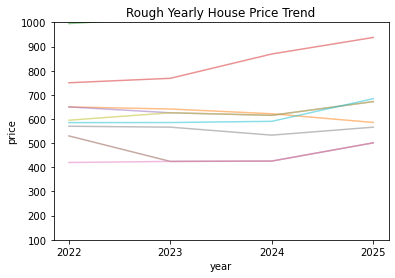

In [34]:
# plot the relationship between selected small range of house price and year
for i in range(90,100):
    df1 = pd.DataFrame(data=[['2022', df_house.iloc[i,1]],
                        ['2023', df_house.iloc[i,2]],
                        ['2024', df_house.iloc[i,3]],
                        ['2025', df_house.iloc[i,4]]],
                 columns = ['year','price'],
                 )
    y = df1['price']
    x = df1['year']
    plt.plot(x, y, alpha=0.5)
plt.xlabel('year')
plt.ylabel('price')
plt.ylim(100, 1000)
plt.title("Rough Yearly House Price Trend")
plt.savefig("../plots/house_price_trend.png")
plt.show()


From the graph above, we can see that house price has different trends in various suburbs. However, most suburbs' house price increase and then drop or maintain the same. While since we select a random range of year, it might be inconsistent and wrong.

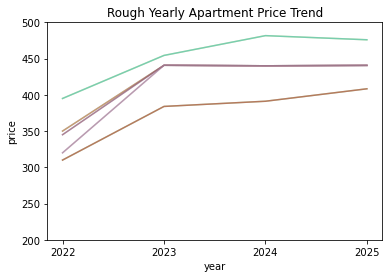

In [35]:
# plot the relationship between house price and year
for i in range(90,100):
    df1 = pd.DataFrame(data=[['2022', apartment.iloc[i,1]],
                        ['2023', apartment.iloc[i,2]],
                        ['2024', apartment.iloc[i,3]],
                        ['2025', apartment.iloc[i,4]]],
                 columns = ['year','price'],
                 )
    y = df1['price']
    x = df1['year']
    plt.plot(x, y, alpha=0.5)
plt.xlabel('year')
plt.ylabel('price')
plt.ylim(200, 500)
plt.title("Rough Yearly Apartment Price Trend")
plt.savefig("../plots/apartment_price_trend.png")
plt.show()

From the plot above, we can see that most suburb's apartment price will increase.

In [36]:
house.to_csv("../data/curated/house2022.csv")
house23.to_csv("../data/curated/house2023.csv")
house24.to_csv("../data/curated/house2024.csv")
house25.to_csv("../data/curated/house2025.csv")
apart.to_csv("../data/curated/apart2022.csv")
apart23.to_csv("../data/curated/apart2023.csv")
apart24.to_csv("../data/curated/apart2024.csv")
apart25.to_csv("../data/curated/apart2025.csv")

#### Answers to Q1-Q3:13_remove_outliers.ipynb; 19_growth_rate_calculate.ipynb; 20_affordbility.ipynb